In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV,RFE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
encode = LabelEncoder()
sme = SMOTE()
pca = PCA()

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link='https://drive.google.com/open?id=1hdavpx6TNFMm_5unP66Wxkls_sX4Xgyh'
link2 = 'https://drive.google.com/open?id=1hkwXBcF9aVdGTBSVWORIEN131QqZnXBL'
#train data link
fluff, id = link.split('=')
fluff,id1 = link2.split('=')
print (id) # Verify that you have everything after '='
print(id1)
#train data
downloaded = drive.CreateFile({'id':id}) 
downloaded1 = drive.CreateFile({'id':id1}) 
downloaded.GetContentFile('train_aero.csv')
downloaded1.GetContentFile('test_aero.csv')  
data = pd.read_csv('train_aero.csv')
test = pd.read_csv('test_aero.csv')
# Dataset is now stored in a Panda

1hdavpx6TNFMm_5unP66Wxkls_sX4Xgyh
1hkwXBcF9aVdGTBSVWORIEN131QqZnXBL


In [0]:
test['Safety_Score'] = MinMaxScaler(feature_range=(0,100)).fit_transform(test[['Safety_Score']])
test['Days_Since_Inspection'] = MinMaxScaler(feature_range=(1,23)).fit_transform(test[['Days_Since_Inspection']])
test['Total_Safety_Complaints'] = MinMaxScaler(feature_range=(0,54)).fit_transform(test[['Total_Safety_Complaints']])
test['Control_Metric'] = MinMaxScaler(feature_range=(21,98)).fit_transform(test[['Control_Metric']])

test['Turbulence_In_gforces'] = MinMaxScaler(feature_range=(0.14,0.88)).fit_transform(test[['Turbulence_In_gforces']])
test['Cabin_Temperature'] = MinMaxScaler(feature_range=(74.74,94.20)).fit_transform(test[['Cabin_Temperature']])
test['Accident_Type_Code'] = MinMaxScaler(feature_range=(1,7)).fit_transform(test[['Accident_Type_Code']])
test['Max_Elevation'] = MinMaxScaler(feature_range=(800,62000)).fit_transform(test[['Max_Elevation']])
test['Violations'] = MinMaxScaler(feature_range=(0,5)).fit_transform(test[['Violations']])
test['Adverse_Weather_Metric'] = MinMaxScaler(feature_range=(0,2.3)).fit_transform(test[['Adverse_Weather_Metric']])

In [0]:
test.shape

(2500, 11)

In [0]:
Y = encode.fit_transform(data['Severity'])


In [0]:
X = data.iloc[:,1:12]

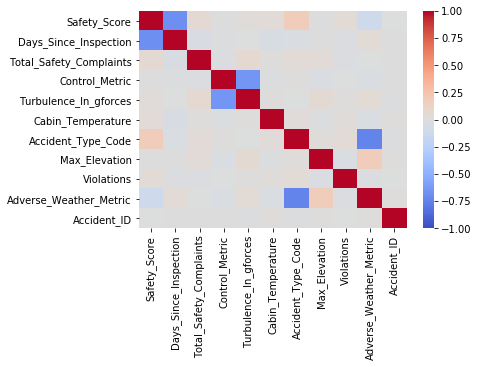

In [0]:
sns.heatmap(data.corr(),vmin=-1, vmax=1, center=0,cmap= 'coolwarm')

In [0]:
X['Safety_Score'] = MinMaxScaler(feature_range=(0,100)).fit_transform(X[['Safety_Score']])
X['Days_Since_Inspection'] = MinMaxScaler(feature_range=(1,23)).fit_transform(X[['Days_Since_Inspection']])
X['Total_Safety_Complaints'] = MinMaxScaler(feature_range=(0,54)).fit_transform(X[['Total_Safety_Complaints']])
X['Control_Metric'] = MinMaxScaler(feature_range=(0,100)).fit_transform(X[['Control_Metric']])

X['Turbulence_In_gforces'] = MinMaxScaler(feature_range=(0.13,0.88)).fit_transform(X[['Turbulence_In_gforces']])
X['Cabin_Temperature'] = MinMaxScaler(feature_range=(74.74,97.51)).fit_transform(X[['Cabin_Temperature']])
X['Accident_Type_Code'] = MinMaxScaler(feature_range=(1,7)).fit_transform(X[['Accident_Type_Code']])
X['Max_Elevation'] = MinMaxScaler(feature_range=(800,6000)).fit_transform(X[['Max_Elevation']])
X['Violations'] = MinMaxScaler(feature_range=(0,5)).fit_transform(X[['Violations']])
X['Adverse_Weather_Metric'] = MinMaxScaler(feature_range=(0,2.3)).fit_transform(X[['Adverse_Weather_Metric']])

In [0]:
from sklearn.model_selection import StratifiedKFold,train_test_split as tts
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
clf = SVC(C=1000,gamma=1e-3,decision_function_shape='ovr',verbose=True)

In [0]:
xtrain,xtest,ytrain,ytest = tts(X,Y,test_size=0.4)

In [0]:
clf = RandomForestClassifier(max_features=6,max_depth=6,random_state=0)

In [0]:
clf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
clf.score(xtrain,ytrain)

0.8435

In [0]:
pred =clf.predict(test)
len(pred)

2500

In [0]:
print(classification_report(ytest[:pred.shape[0]],pred))

              precision    recall  f1-score   support

           0       0.31      0.30      0.31       760
           1       0.25      0.28      0.26       617
           2       0.17      0.14      0.15       449
           3       0.28      0.28      0.28       674

    accuracy                           0.26      2500
   macro avg       0.25      0.25      0.25      2500
weighted avg       0.26      0.26      0.26      2500



In [0]:
sol = pd.DataFrame()

In [0]:
sol['Accident_ID'] = test['Accident_ID']

In [0]:
sol['Severity'] = encode.inverse_transform(pred)

In [0]:
pd.DataFrame(sol).to_csv('Solve.csv',index=False)

In [0]:
from google.colab import files

In [0]:
files.download('Solve.csv')

In [0]:
sol.shape

(2500, 2)